# subiectul 1


In [20]:
import pymc as pm
import pandas as pd
import numpy as np

data = pd.read_csv("date_alegeri_turul2.csv")

print(data.columns)

data['Sex'] = data['Sex'].astype(int)
data['Educatie'] = data['Educatie'].astype(int)
data['Vot'] = data['Vot'].astype(int)

with pm.Model() as model:
    intercept = pm.Normal("intercept", mu=0, sigma=10)
    coef_vârstă = pm.Normal("coef_varsta", mu=0, sigma=10)
    coef_sex = pm.Normal("coef_sex", mu=0, sigma=10)
    coef_educație = pm.Normal("coef_educatie", mu=0, sigma=10)
    coef_venit = pm.Normal("coef_venit", mu=0, sigma=10)

    logit_p = (
        intercept
        + coef_vârstă * data["Varsta"]
        + coef_sex * data["Sex"]
        + coef_educație * data["Educatie"]
        + coef_venit * data["Venit"]
    )

    p = pm.math.sigmoid(logit_p)
    likelihood = pm.Bernoulli("likelihood", p=p, observed=data["Vot"])

    trace = pm.sample(1000, return_inferencedata=True, idata_kwargs={"log_likelihood": True})


Index(['Varsta', 'Sex', 'Educatie', 'Venit', 'Vot'], dtype='object')


Output()

Output()

## 1.b cele doua variabile care influenteaza cel mai mult rezultatetul sunt educatie si venit deoarece pot sa afecteze pereferintele de vot.

Output()

Output()

array([<Axes: title={'center': 'coef_educatie'}>,
       <Axes: title={'center': 'coef_venit'}>,
       <Axes: title={'center': 'intercept'}>], dtype=object)

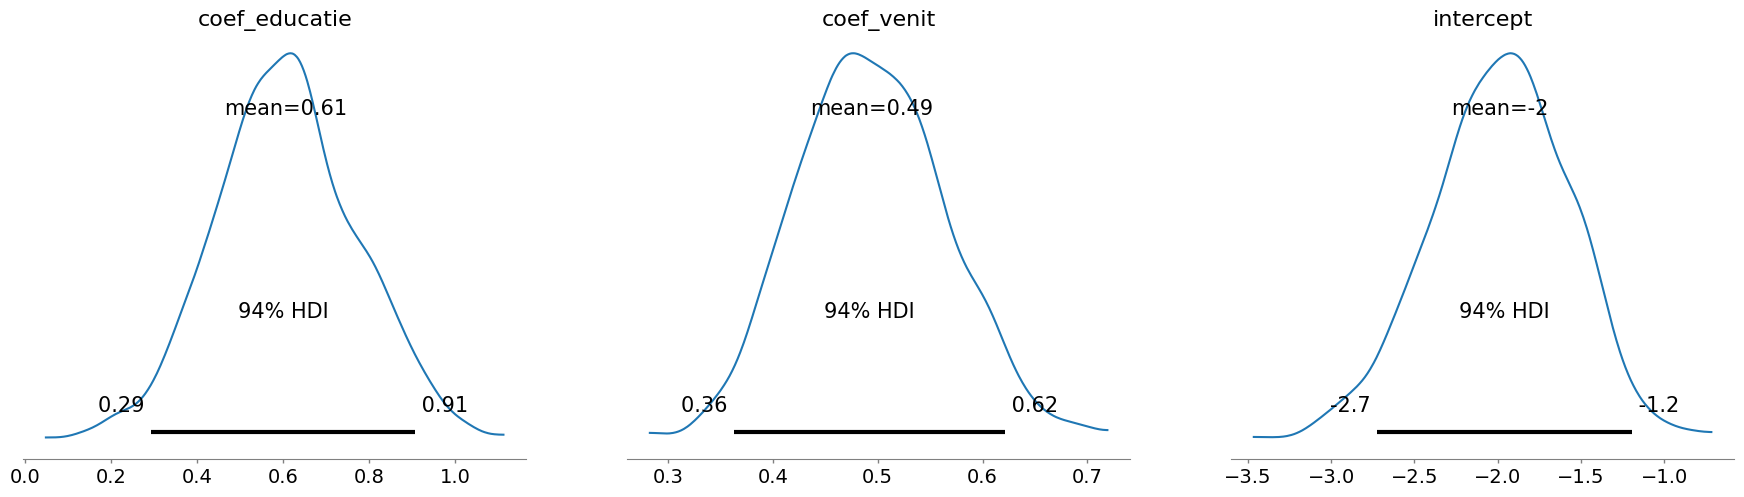

In [22]:
#1.c

with pm.Model() as model_2:
    intercept = pm.Normal("intercept", mu=0, sigma=10)
    coef_educație = pm.Normal("coef_educatie", mu=0, sigma=10)
    coef_venit = pm.Normal("coef_venit", mu=0, sigma=10)

    logit_p = intercept + coef_educație * data["Educatie"] + coef_venit * data["Venit"]

    p = pm.math.sigmoid(logit_p)
    likelihood = pm.Bernoulli("likelihood", p=p, observed=data["Vot"])

    trace_2 = pm.sample(1000, return_inferencedata=True, idata_kwargs={"log_likelihood": True})


import arviz as az
az.plot_posterior(trace_2)


In [24]:
#1.d

waic_1 = pm.waic(trace, model)
waic_2 = pm.waic(trace_2, model_2)

print("WAIC Model 1:", waic_1)
print("WAIC Model 2:", waic_2)

WAIC Model 1: Computed from 2000 posterior samples and 500 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -211.45    12.80
p_waic        4.59        -
WAIC Model 2: Computed from 2000 posterior samples and 500 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -218.64    12.67
p_waic        3.01        -


## deci modelul de la 1.a este mai bun

# subiectul 2

In [8]:
#model mixt pentru clasificare

from sklearn.mixture import BayesianGaussianMixture

iris_data = pd.read_csv("iris.csv")

X = iris_data.iloc[:, :-1]
y = iris_data["species"]

bgmm = BayesianGaussianMixture(n_components=3, random_state=42)
bgmm.fit(X)

y_pred = bgmm.predict(X)


In [9]:
#verificam cat de bine separa caracteristicile date

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(classification_report(y_encoded, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      50.0
           1       0.00      0.00      0.00      50.0
           2       0.00      0.00      0.00      50.0

    accuracy                           0.00     150.0
   macro avg       0.00      0.00      0.00     150.0
weighted avg       0.00      0.00      0.00     150.0

